# Fligh Price Prediction Model

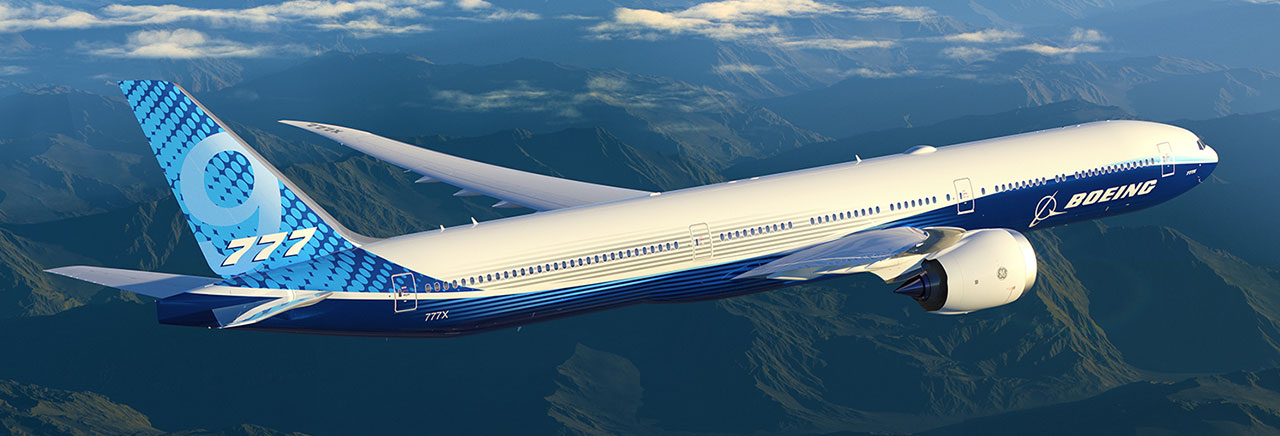

In [2]:
import IPython
image_url = 'https://www.boeing.com/content/theboeingcompany/us/en/commercial/777x/by-design/_jcr_content/root/container_2091943792/hero_teaser.coreimg.jpeg/1702317983600/cover-image-blue-livery.jpeg'
IPython.display.Image(image_url)

### Model Descirption:-
# Flights data used to predict the future prices 

### Step1: Downloading dataset and saving into server system

In [4]:
#Downloading data
import kagglehub
kaggle_url = "rohitgrewal/airlines-flights-data"
path = kagglehub.dataset_download(kaggle_url)
print('done')

done


### Step 2.1 : Extracting the data and converting it into dataframe

In [5]:
#checking availables data files in system (csv or excel)
import os
available_files_list= os.listdir(path)
print(f"There are {len(available_files_list)} File available")
for i,value in enumerate(available_files_list):
    print(f"File {i+1} :  {value}")

There are 1 File available
File 1 :  airlines_flights_data.csv


### Step 2.2: Converting into dataframe

In [6]:
import pandas as pd
file_path = path + '\\' + available_files_list[0] 
df = pd.read_csv(file_path)

### Step 3.1: Exploring data using EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [8]:
# We have over 300,000 flight records

In [9]:
#Now looking for the data essentials:-
dfShape = df.shape
number_of_rows = dfShape[0]
number_of_columns = dfShape[1]
print(f'''
Data Shape : {dfShape}
Number of rows : {number_of_rows}
Number of columns : {number_of_columns}
''')


Data Shape : (300153, 12)
Number of rows : 300153
Number of columns : 12



In [10]:
#Column data:-
df_column = df.columns
print(f"Column Data : {df_column}")

Column Data : Index(['index', 'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')


In [11]:
#Sample data
df.sample()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
41274,41274,Air_India,AI-868,Delhi,Evening,one,Early_Morning,Chennai,Economy,13.33,39,3988


In [12]:
'''
We have 12 features, but out of those 12, only 9 will directly affect the flight prices
Features not affecting:-
1. index
2. flight
3. arrival time
'''

'\nWe have 12 features, but out of those 12, only 9 will directly affect the flight prices\nFeatures not affecting:-\n1. index\n2. flight\n3. arrival time\n'

In [13]:
# Exploring the head and tail sections

In [14]:
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [15]:
df.tail()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [16]:
maximumPrice = max(df['price'])
minimumPrice = min(df['price'])
print(f'''
Maximum Ticket price : {maximumPrice}
Lowest Ticket price: {minimumPrice}
''')



Maximum Ticket price : 123071
Lowest Ticket price: 1105



In [17]:
#Checking for null values
df.isna().sum()

index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [18]:
#No null Values found

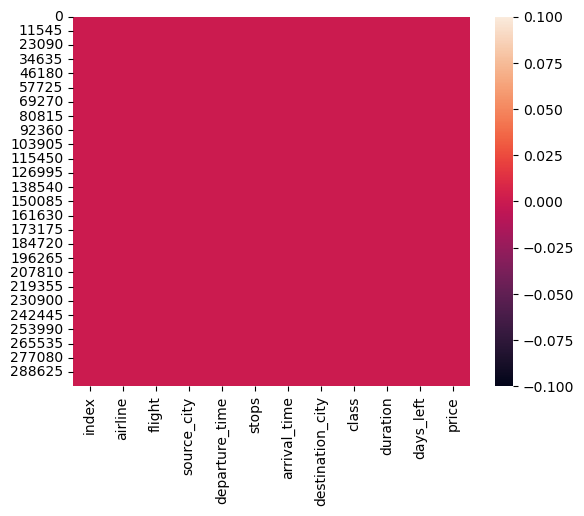

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isna())
plt.show()

In [20]:
#No null valus are found!

In [21]:
df.sample()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
55842,55842,Indigo,6E-5209,Mumbai,Early_Morning,one,Afternoon,Bangalore,Economy,7.08,19,4211


In [22]:
'''
Cleaning data as we need numerical vales but in columns, 
departure_time, stops, arrival_time, class: textual data is available
'''


'\nCleaning data as we need numerical vales but in columns, \ndeparture_time, stops, arrival_time, class: textual data is available\n'

In [23]:
column_to_Check = ['source_city','departure_time','stops','arrival_time','class']
for i in column_to_Check:
    print(f"{i}: {df[i].unique()}")

source_city: ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
departure_time: ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
stops: ['zero' 'one' 'two_or_more']
arrival_time: ['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
class: ['Economy' 'Business']


In [24]:
import warnings
warnings.filterwarnings('ignore')
column_size = len(column_to_Check)
for i in range(column_size):
    current_element = df[column_to_Check[i]].unique()
    to_replace={}
    for i in range(len(current_element)):
        current_key=current_element[i]
        current_value=i+1
        to_replace[current_key] = current_value
    print(to_replace)
    df=df.replace(to_replace)
    print('done')
print('check Now')

{'Delhi': 1, 'Mumbai': 2, 'Bangalore': 3, 'Kolkata': 4, 'Hyderabad': 5, 'Chennai': 6}
done
{'Evening': 1, 'Early_Morning': 2, 'Morning': 3, 'Afternoon': 4, 'Night': 5, 'Late_Night': 6}
done
{'zero': 1, 'one': 2, 'two_or_more': 3}
done
{np.int64(5): 1, np.int64(3): 2, np.int64(2): 3, np.int64(4): 4, np.int64(1): 5, np.int64(6): 6}
done
{'Economy': 1, 'Business': 2}
done
check Now


In [25]:
df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,5,5,5,1,3,1,2.17,5,5953
1,5,SpiceJet,SG-8157,5,3,5,2,3,1,2.33,5,5953
2,3,AirAsia,I5-764,5,3,5,3,3,1,2.17,5,5956
3,2,Vistara,UK-995,5,2,5,4,3,1,2.25,5,5955
4,4,Vistara,UK-963,5,2,5,2,3,1,2.33,5,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,6,2,3,5,1,2,10.08,49,69265
300149,300149,Vistara,UK-826,6,4,3,1,1,2,10.42,49,77105
300150,300150,Vistara,UK-832,6,3,3,1,1,2,13.83,49,79099
300151,300151,Vistara,UK-828,6,3,3,5,1,2,10.00,49,81585


In [26]:
df.sample()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
51091,51091,Air_India,AI-625,3,2,3,1,5,1,13.42,41,5219


In [27]:
#Now creating a list that contains necessary columns for ML training
final_column = ['source_city','departure_time','stops','arrival_time','destination_city','class','duration','days_left','price']
final_df = df[final_column]
final_df.sample()

,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
141248,4,4,3,1,2,1,6.83,41,6028


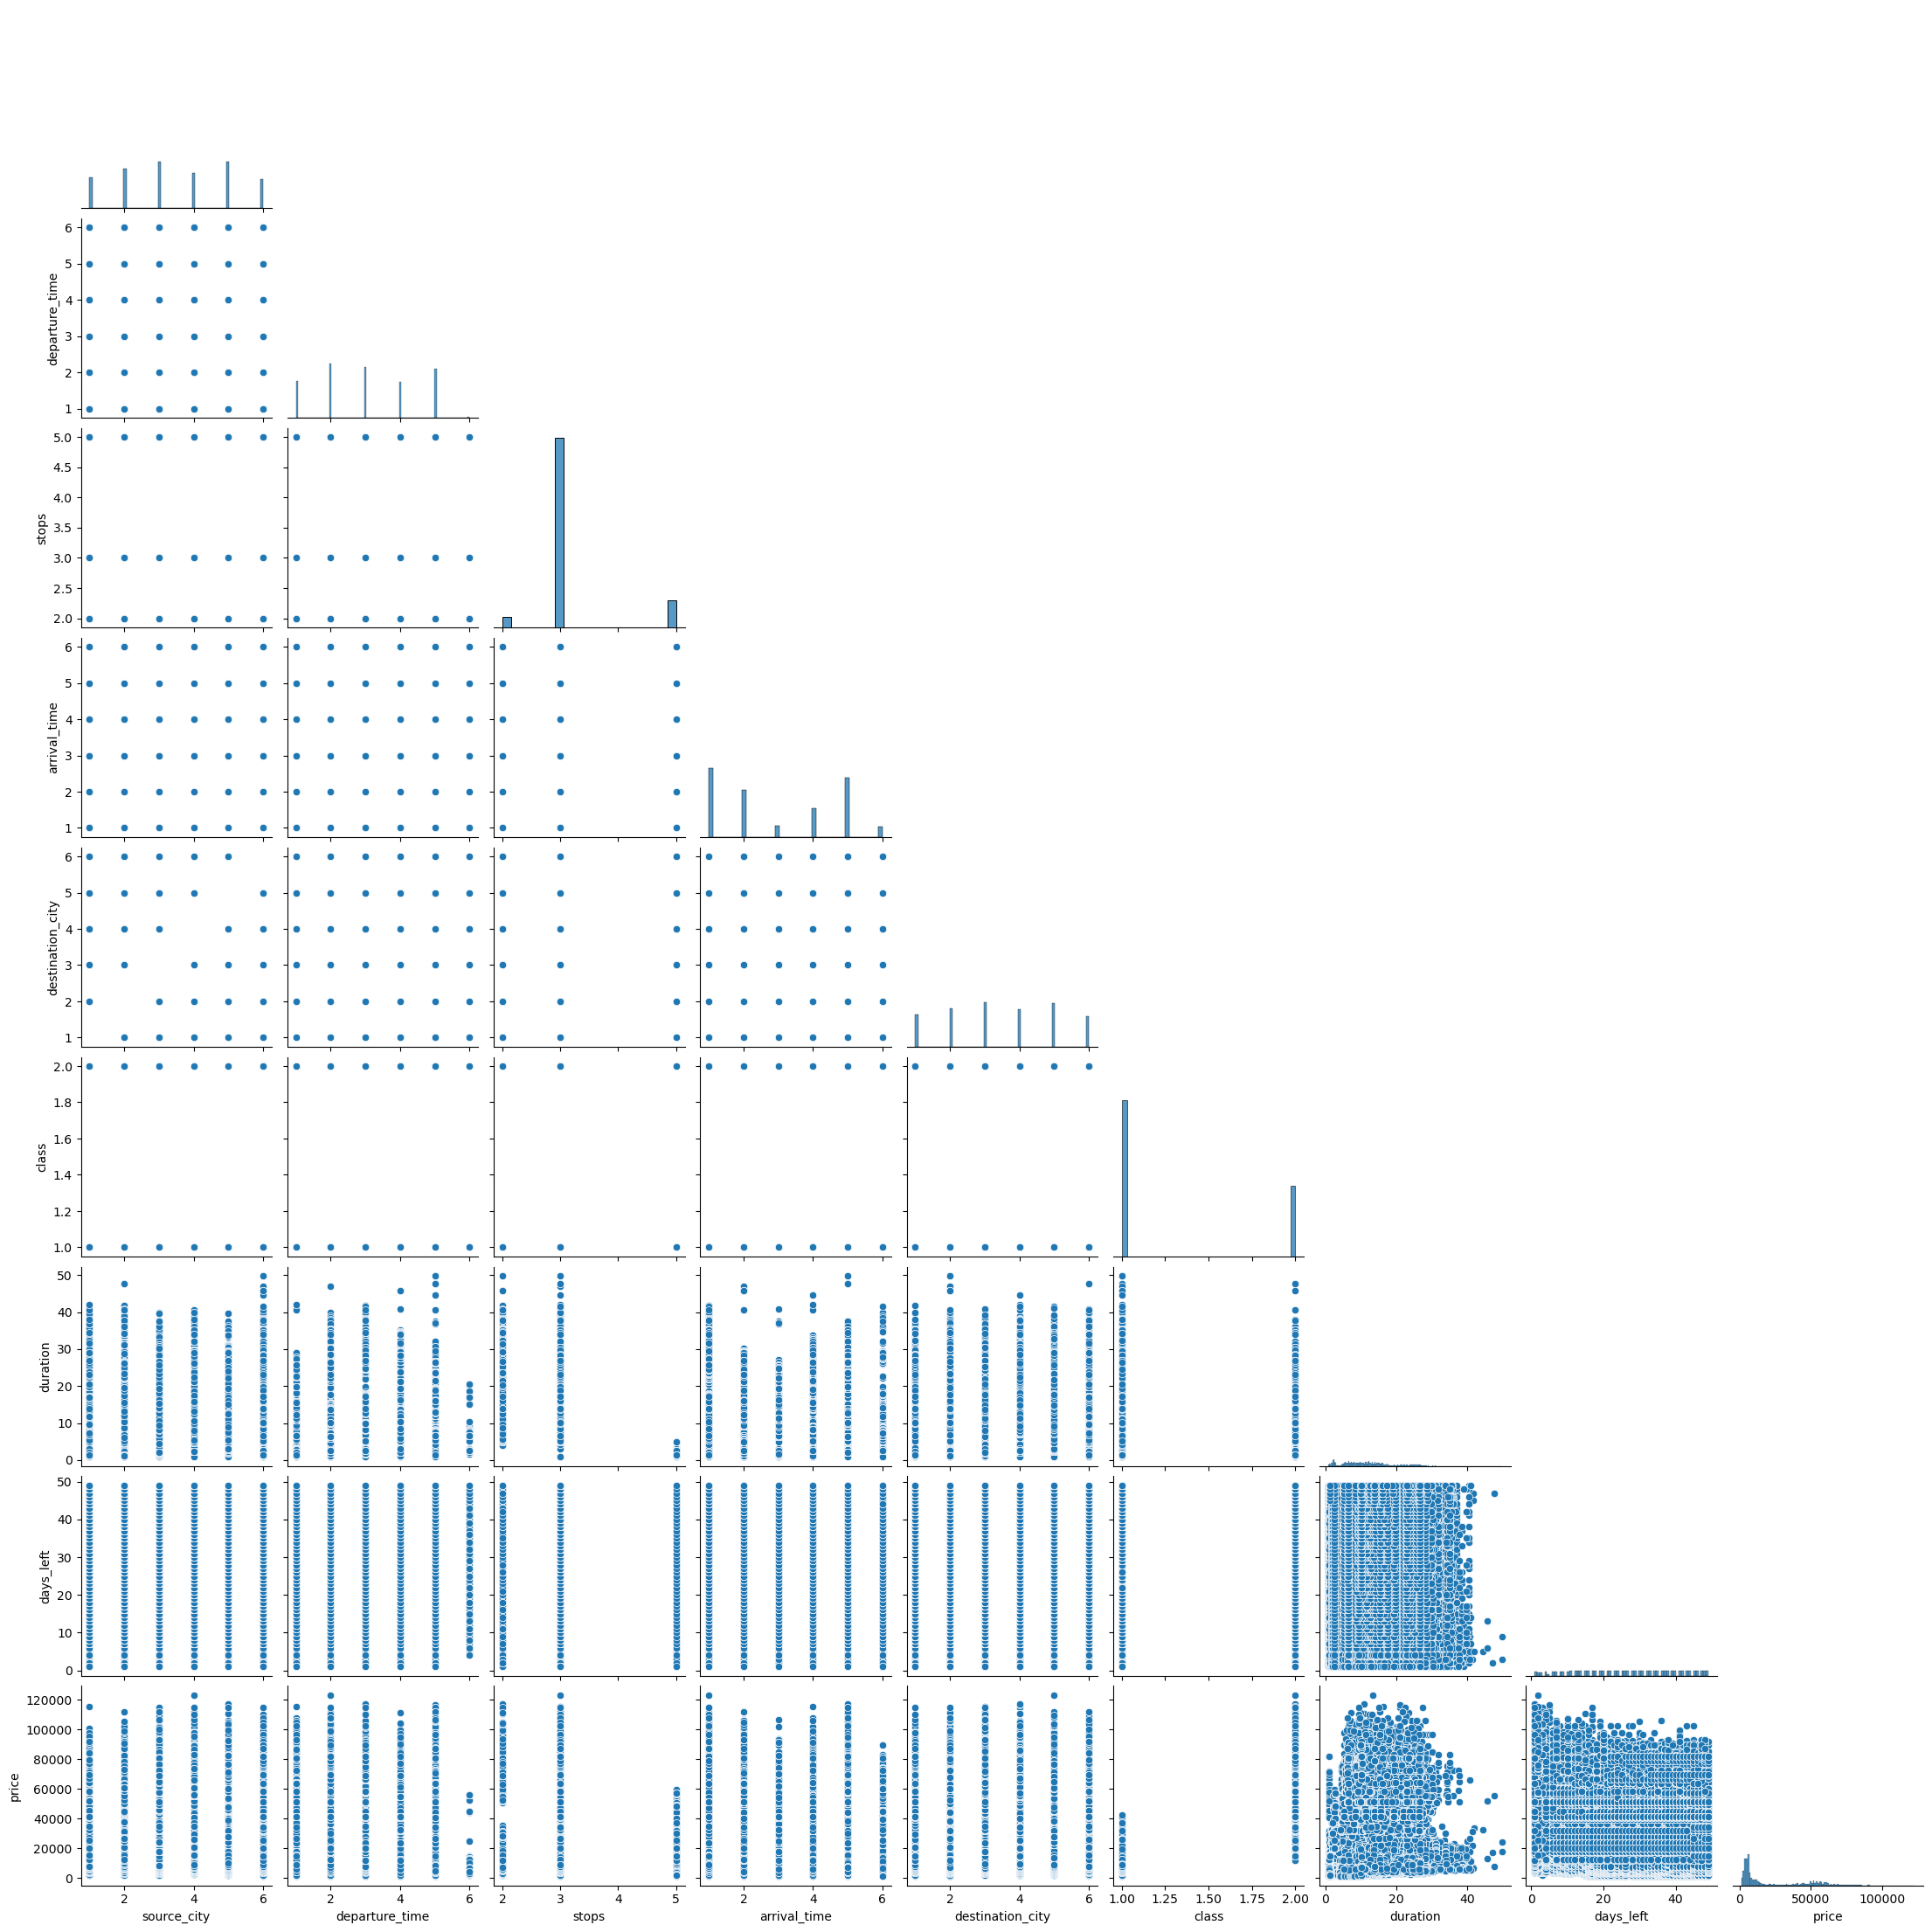

In [28]:
sns.pairplot(final_df,corner=True)
plt.show()

In [29]:
final_df.describe()

,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000
mean,3.504609,3.049108,3.195640,2.969939,3.495874,1.311464,12.210613,25.957835,20889.660523
std,1.610881,1.393010,0.696993,1.737428,1.622809,0.463093,7.205175,13.640306,22697.767366
min,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.830000,1.000000,1105.000000
25%,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000,6.830000,15.000000,4783.000000
50%,3.000000,3.000000,3.000000,2.000000,3.000000,1.000000,11.250000,26.000000,7425.000000
75%,5.000000,4.000000,3.000000,5.000000,5.000000,2.000000,16.170000,38.000000,42521.000000
max,6.000000,6.000000,5.000000,6.000000,6.000000,2.000000,49.830000,49.000000,123071.000000


In [30]:
final_df.sample()

,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
18924,5,1,3,3,2,1,9.25,44,4020


In [31]:
#dataX be the features influencing the Price
dataX= final_df[['source_city','departure_time','stops','arrival_time','destination_city','class','duration','days_left']]
#dataY be the price 
dataY= final_df['price']
print('data Split successfully!')

data Split successfully!


In [32]:
dataX.sample()

,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
35766,5,2,3,1,6,1,11.42,1


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataX,dataY,test_size=0.17, random_state= 150 )
print('Done')


Done


In [34]:
#Overviewing the shapes
print(f'''
Training Data:- 
Shape of X_train : {X_train.shape}
shape of y_train : {y_train.shape}
 {'_'*40}
shape of X_test : {X_test.shape}
shape of Y_test : {y_test.shape}

''')


Training Data:- 
Shape of X_train : (249126, 8)
shape of y_train : (249126,)
 ________________________________________
shape of X_test : (51027, 8)
shape of Y_test : (51027,)




# MODEL CREATION

In [63]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [36]:
#Making prediction
y_predicted = model.predict(X_test)
print("Prediction successfully!")

Prediction successfully!


In [37]:
#Creating a temporary dataframe called comparing_df to explore the results
comparing_data_dict = {
"Actual Price":y_test,
"Predicted Price":y_predicted,
"Margin of Error":abs(y_test-y_predicted)
}
comparison_df = pd.DataFrame(comparing_data_dict)
comparison_df["Actual Price"]=round(comparison_df["Actual Price"])
comparison_df["Predicted Price"]=round(comparison_df["Predicted Price"])
comparison_df["Margin of Error"]=round(comparison_df["Margin of Error"])
comparison_df["Error Percentage"]=round(comparison_df["Margin of Error"] / comparison_df["Actual Price"] *100 ,1)

In [38]:
comparison_df

,Actual Price,Predicted Price,Margin of Error,Error Percentage
211911,41337,50524.0,9187.0,22.2
56138,6502,8037.0,1535.0,23.6
267069,64831,54451.0,10380.0,16.0
166935,6461,9253.0,2792.0,43.2
141508,3862,5315.0,1453.0,37.6
...,...,...,...,...
285160,51707,50635.0,1072.0,2.1
107782,3393,5504.0,2111.0,62.2
176596,13240,14770.0,1530.0,11.6
228667,41101,52275.0,11174.0,27.2


In [39]:
def Errors(model,xTrain,yTrain):
    from sklearn.metrics import mean_absolute_error, mean_squared_error,root_mean_squared_error
    mae=mean_absolute_error(xTrain,yTrain) 
    mse =mean_squared_error(xTrain,yTrain) 
    rmse =root_mean_squared_error(xTrain,yTrain) 

    print(f'''
Errors:-
1. Mean Absolute Error = {mae}
2. Mean Squared Error = {mse}
3. Root Mean Square Error ={rmse}  
    ''')

        

In [40]:
Errors(model,y_test,y_predicted)


Errors:-
1. Mean Absolute Error = 4675.304117367418
2. Mean Squared Error = 50648043.93511421
3. Root Mean Square Error =7116.74391383547  
    


In [41]:
print(f'''
Training Score: {model.score(X_train,y_train)}
Testing Score: {model.score(X_test,y_test)}
''')


Training Score: 0.9016753022635924
Testing Score: 0.9014592381150173



In [42]:
dataX.sample()

,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
208491,5,4,3,1,3,2,7.58,18


In [44]:
def getCity_Code(city_name):
    city_dict={'Delhi': 1, 'Mumbai': 2, 'Bangalore': 3, 'Kolkata': 4, 'Hyderabad': 5, 'Chennai': 6}
    return city_dict[city_name]

def getTiming_Code(timing):
    time_dict={'Evening': 1, 'Early_Morning': 2, 'Morning': 3, 'Afternoon': 4, 'Night': 5, 'Late_Night': 6}
    return time_dict[timing]

def getStopCode(num):
    if 'zero' in num:
        return 1
    elif 'one' in num:
        return 2
    else:
        return 3

def getClass_Code(airliner_Class):
    c={'Economy': 1, 'Business': 2}
    return c[airliner_Class]  

print("Functions Created Successfully!")

Functions Created Successfully!


In [45]:
dataX.sample()

,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
127994,4,4,2,2,3,1,20.08,1


In [87]:
def final_y(X):
    to_predict = [0,0,0,0,0,0,0,0]
    to_predict[0] = getCity_Code(X[0])
    to_predict[1] = getTiming_Code(X[1])
    to_predict[2] = getStopCode(X[2])
    to_predict[3] = getTiming_Code(X[3])
    to_predict[4] = getCity_Code(X[4])
    to_predict[5] = getClass_Code(X[5])
    to_predict[6] = X[6]
    to_predict[7] = X[7]
    y=model.predict([to_predict])

    return round(y[0],1)

ans=final_y(['Delhi',"Morning","one","Evening","Mumbai","Business",3,2])
print(ans)

59596.8


In [91]:
df.sample()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
52089,52089,AirAsia,I5-620,3,3,3,5,5,1,13.42,46,3279


In [92]:
print(final_y(["Delhi","Evening","three","Evening","Mumbai","Economy",23.8,39]))

6139.1


In [98]:
import pickle

with open('model.pkl','wb') as f:
    pickle.dump(model,f)
    #pickle.dump(final_y,f)

print('done')

done


In [94]:
with open('final_y.pkl','wb') as f:
    pickle.dump(final_y,f)

print('Done!')

Done!
